# Explore here

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
df.drop_duplicates(inplace = True)

<Axes: xlabel='Outcome', ylabel='Count'>

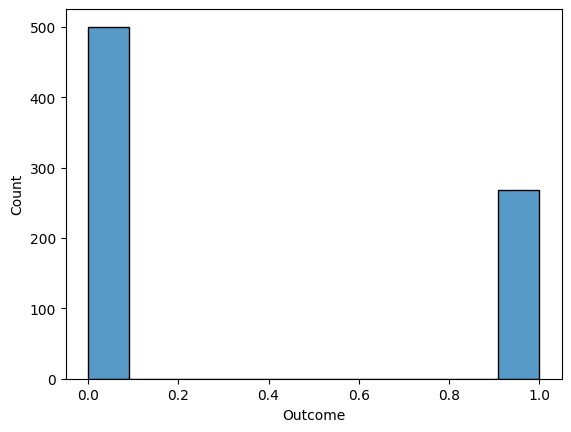

In [3]:
import seaborn as sns
sns.histplot(data=df, x='Outcome')

<Axes: xlabel='Age'>

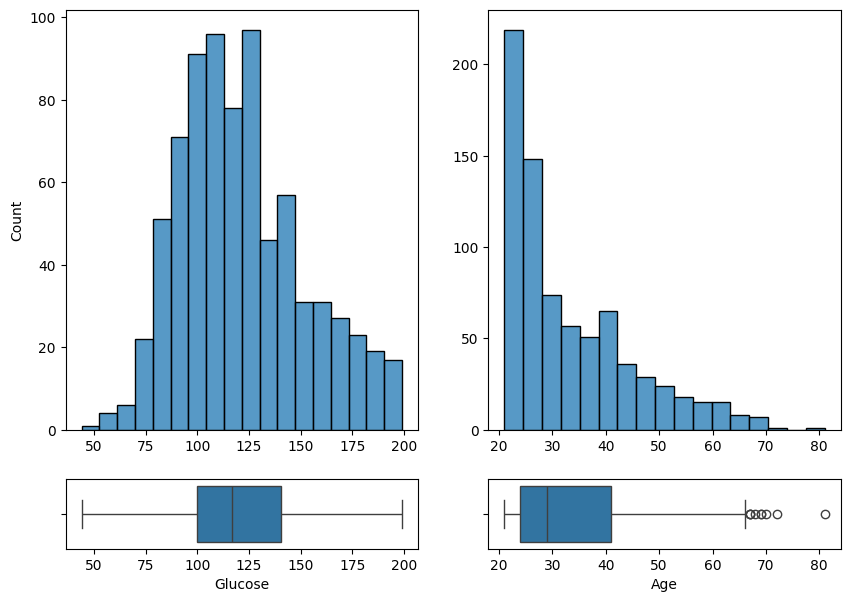

In [8]:
import matplotlib.pyplot as plt

fig,axis= plt.subplots(2,2,figsize=(10,7),gridspec_kw={'height_ratios':[6,1]})
sns.histplot(ax=axis[0,0],data=df, x='Glucose').set(xlabel=None)
sns.boxplot(ax=axis[1,0],data=df, x='Glucose')
sns.histplot(ax=axis[0,1],data=df, x='Age').set(xlabel=None, ylabel = None)
sns.boxplot(ax=axis[1,1],data=df, x='Age')


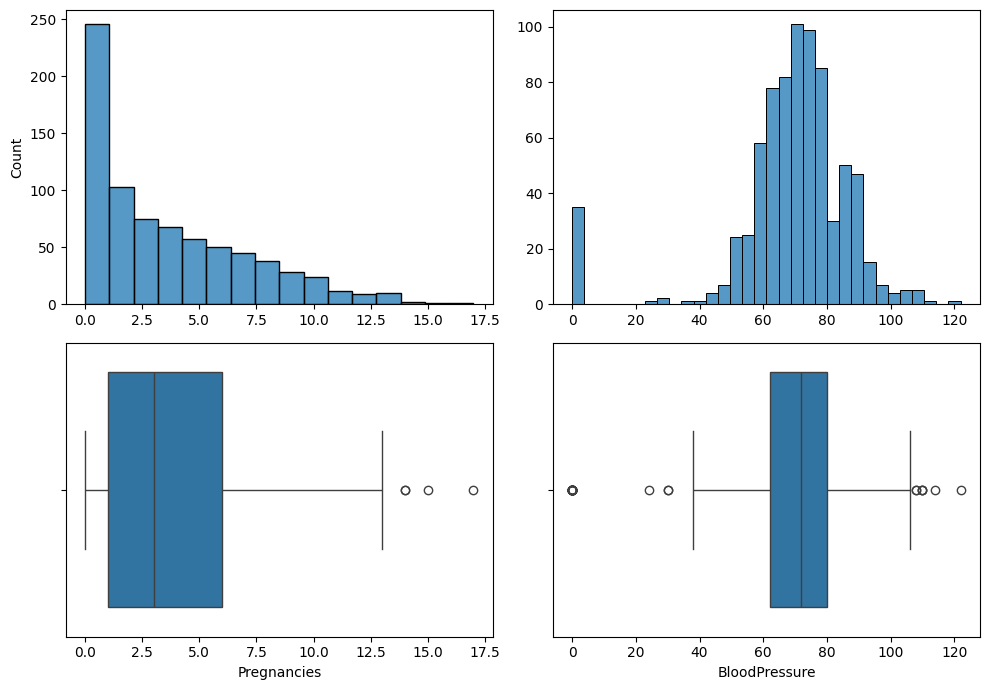

In [5]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [3,3]})

sns.histplot(ax=axis[0,0],data=df, x='Pregnancies').set(xlabel=None)
sns.boxplot(ax=axis[1,0],data=df, x='Pregnancies')
sns.histplot(ax=axis[0,1],data=df, x='BloodPressure').set(xlabel=None, ylabel = None)
sns.boxplot(ax=axis[1,1],data=df, x='BloodPressure')


plt.tight_layout()  # This helps with spacing and layout
plt.show()

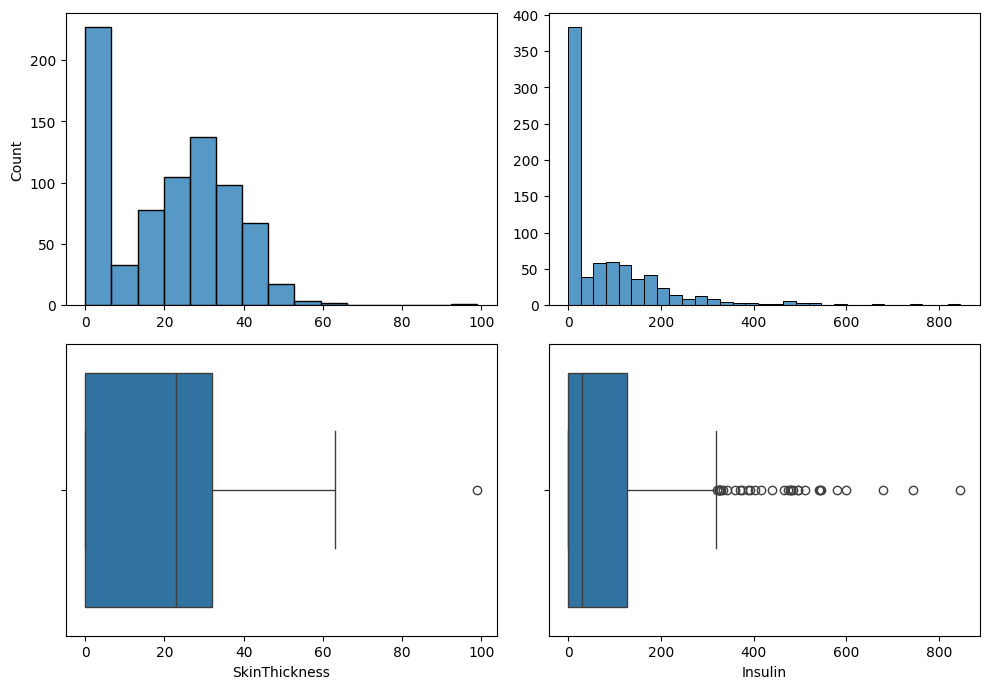

In [6]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [3,3]})

sns.histplot(ax=axis[0,0],data=df, x='SkinThickness').set(xlabel=None)
sns.boxplot(ax=axis[1,0],data=df, x='SkinThickness')
sns.histplot(ax=axis[0,1],data=df, x='Insulin').set(xlabel=None, ylabel = None)
sns.boxplot(ax=axis[1,1],data=df, x='Insulin')


plt.tight_layout()  # This helps with spacing and layout
plt.show()

##### Cambiando los datos con ceros a promedio

In [7]:

df['Glucose'][df['Glucose']==0] = df['Glucose'][df['Glucose']!=0].mean()
df[df['Glucose']==0]

/tmp/ipykernel_23615/1706415933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Glucose'][df['Glucose']==0] = df['Glucose'][df['Glucose']!=0].mean()
/tmp/ipykernel_23615/1706415933.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['Glucose'][df['Glucose']==0] = df['Glucose'][df['Glucose']!=0].mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.435949,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


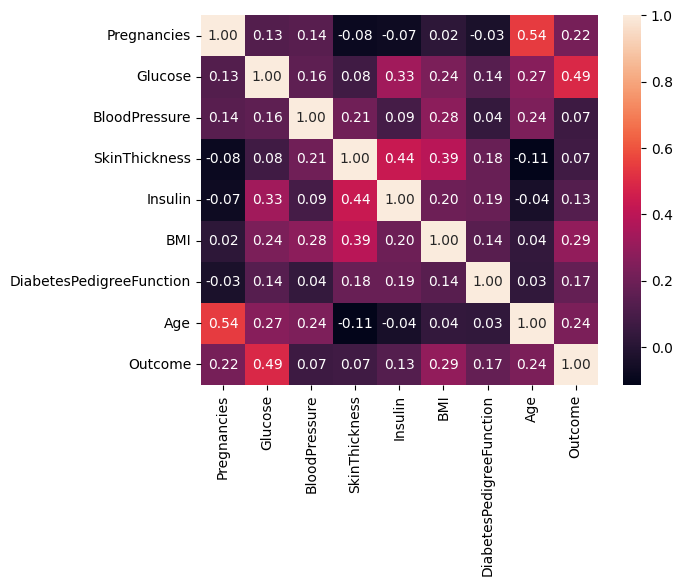

In [12]:
sns.heatmap(df.corr(),annot =True,fmt='.2f' )

plt.show()

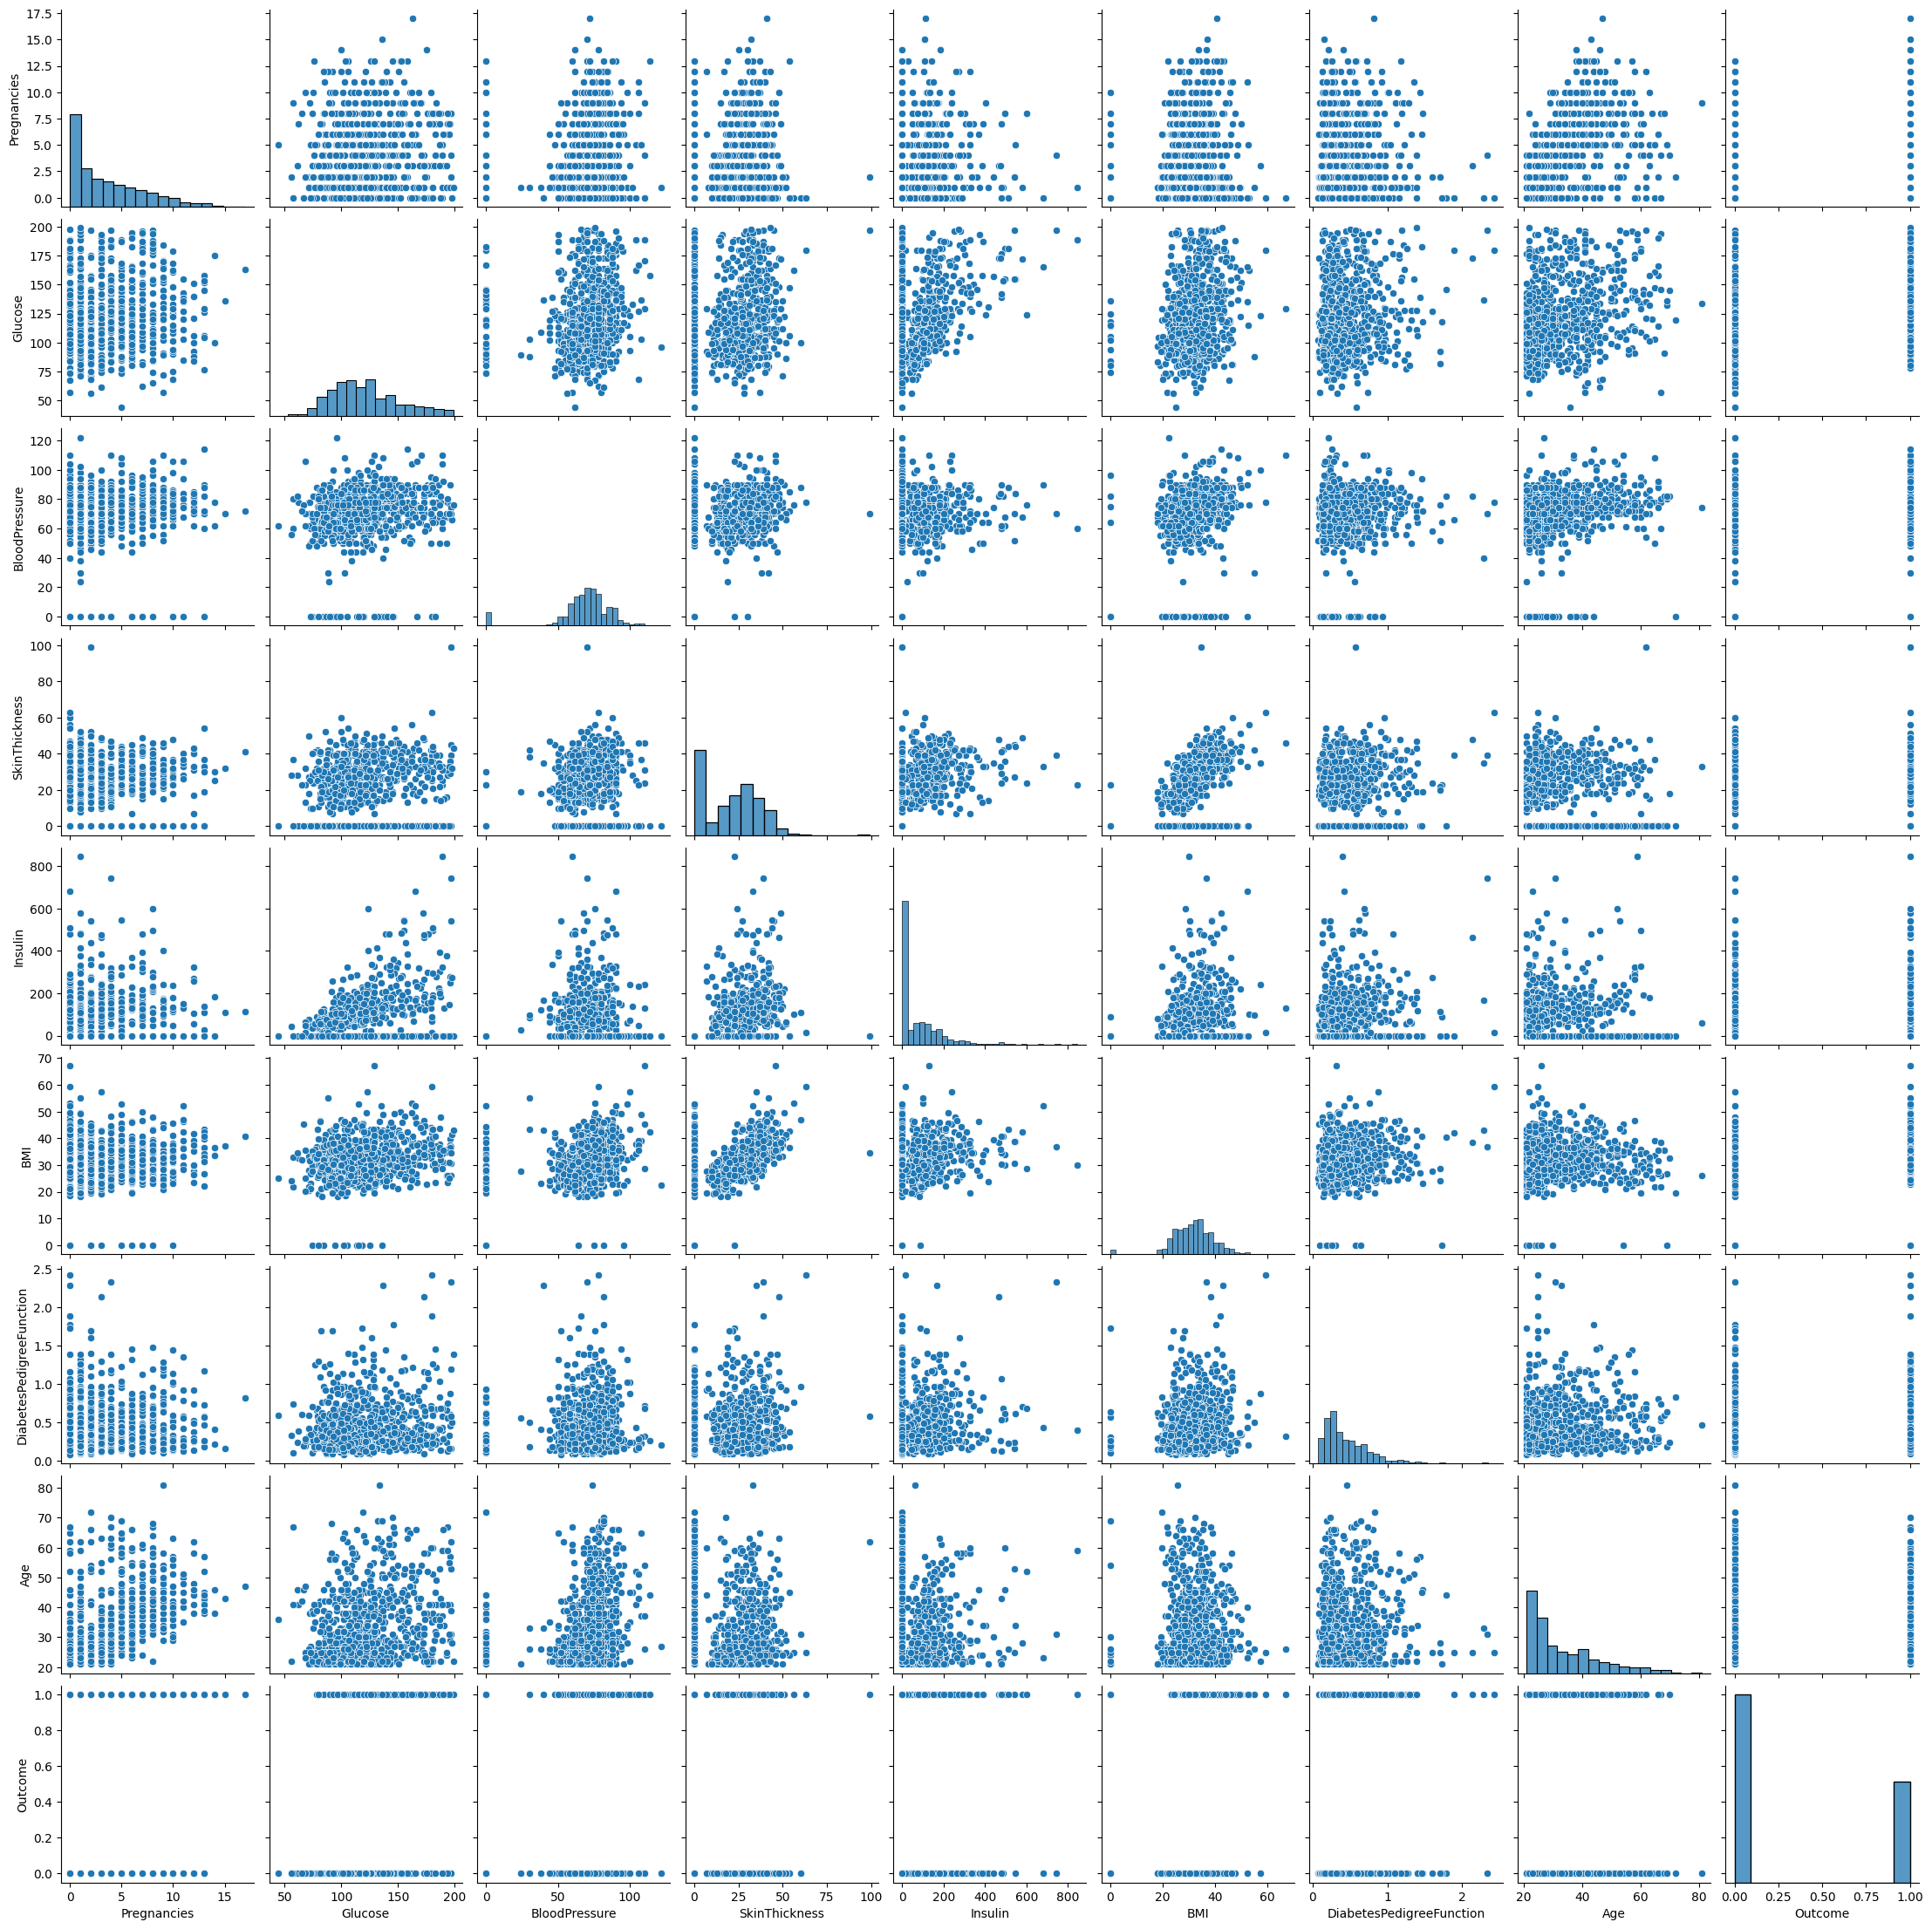

In [13]:
sns.pairplot(df)

In [14]:
X= df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

<Axes: >

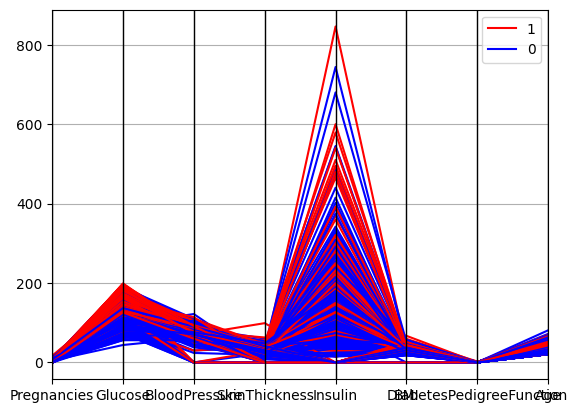

In [17]:
pd.plotting.parallel_coordinates(df, 'Outcome', color=('red','blue'))

In [28]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0.51, 0.3 , 0.07, 0.08, 0.37, 0.65, 0.03, 0.75, 0.58, 0.71, 0.21,
       0.84, 0.37, 0.51, 0.02, 0.38, 0.02, 0.01, 0.63, 0.62, 0.45, 0.03,
       0.17, 0.02, 0.53, 0.99, 0.02, 0.01, 0.1 , 0.03, 0.66, 0.78, 0.85,
       0.79, 0.58, 0.58, 0.87, 0.56, 0.17, 0.8 , 0.05, 0.39, 0.8 , 0.55,
       0.02, 0.71, 0.35, 0.11, 0.02, 0.95, 0.  , 0.86, 0.67, 0.19, 0.15,
       0.12, 0.53, 0.03, 0.32, 0.77, 0.65, 0.14, 0.21, 0.44, 0.02, 0.74,
       0.  , 0.58, 0.02, 0.71, 0.62, 0.08, 0.03, 0.03, 0.13, 0.36, 0.1 ,
       0.04, 0.05, 0.2 , 0.71, 0.1 , 0.11, 0.66, 0.36, 0.96, 0.64, 0.5 ,
       0.34, 0.05, 0.05, 0.15, 0.01, 0.53, 0.38, 0.67, 0.65, 0.06, 0.81,
       0.02, 0.83, 0.05, 0.54, 0.67, 0.87, 0.11, 0.21, 0.99, 0.24, 0.88,
       0.01, 0.78, 0.22, 0.8 , 0.31, 0.45, 0.83, 0.35, 0.01, 0.63, 0.  ,
       0.31, 0.4 , 0.03, 0.26, 0.45, 0.33, 0.73, 0.7 , 0.71, 0.72, 0.62,
       0.07, 0.4 , 0.95, 0.42, 0.3 , 0.67, 0.83, 0.  , 0.03, 0.01, 0.2 ,
       0.45, 0.1 , 0.08, 0.09, 0.01, 0.51, 0.73, 0.

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared (R²): {r2_score(y_test, y_pred)}")


Mean squared error: 0.16871363636363637
R-squared (R²): 0.2651583838383835


In [ ]:
from pickle import dump
dump(model, open("random_forest_regressor_100_estimators_42.sav", "wb"))